In [16]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# to split the datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

### Standardization

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

In [4]:
_source = load_boston()
data = pd.DataFrame(_source.data, columns=_source.feature_names)
data["MEDV"] = _source.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
print(_source.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# let's separate the data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1),
    data['MEDV'],
    test_size=0.3,
    random_state=0
)

x_train.shape, x_test.shape

((354, 13), (152, 13))

In [8]:
# standard scaling
scaler = StandardScaler()
scaler.fit(x_train)

# returns a numpy array
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
scaler.mean_

array([3.35828432e+00, 1.18093220e+01, 1.10787571e+01, 6.49717514e-02,
       5.56098305e-01, 6.30842655e+00, 6.89940678e+01, 3.76245876e+00,
       9.35310734e+00, 4.01782486e+02, 1.84734463e+01, 3.60601186e+02,
       1.24406497e+01])

In [13]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [11]:
np.round(x_train.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,3.4,11.8,11.1,0.1,0.6,6.3,69.0,3.8,9.4,401.8,18.5,360.6,12.4
std,8.4,23.7,7.0,0.2,0.1,0.7,28.0,2.1,8.7,170.6,2.2,85.6,7.1
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.2,1.0,187.0,12.6,0.3,1.7
25%,0.1,0.0,5.0,0.0,0.4,5.9,45.2,2.1,4.0,276.0,17.4,376.1,6.7
50%,0.3,0.0,8.6,0.0,0.5,6.2,79.4,3.2,5.0,311.0,19.1,391.6,11.2
75%,3.1,20.0,18.1,0.0,0.6,6.6,93.8,5.1,24.0,666.0,20.2,395.7,16.7
max,89.0,100.0,27.7,1.0,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,37.0


In [15]:
np.round(x_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.4,-0.5,-1.5,-0.3,-1.5,-3.9,-2.4,-1.3,-1.0,-1.3,-2.6,-4.2,-1.5
25%,-0.4,-0.5,-0.9,-0.3,-0.9,-0.6,-0.9,-0.8,-0.6,-0.7,-0.5,0.2,-0.8
50%,-0.4,-0.5,-0.4,-0.3,-0.2,-0.1,0.4,-0.3,-0.5,-0.5,0.3,0.4,-0.2
75%,-0.0,0.3,1.0,-0.3,0.6,0.5,0.9,0.6,1.7,1.6,0.8,0.4,0.6
max,10.3,3.7,2.4,3.8,2.7,3.5,1.1,4.1,1.7,1.8,1.6,0.4,3.5


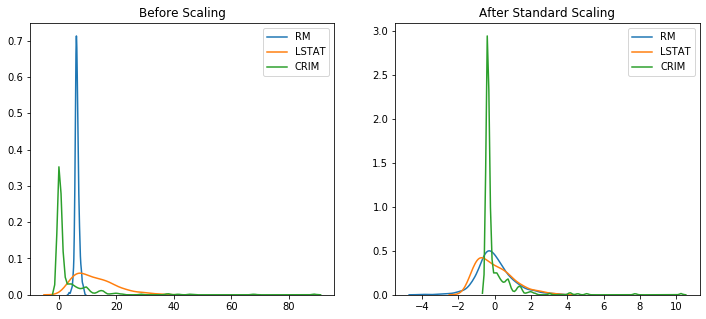

In [17]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['RM'], ax=ax1)
sns.kdeplot(x_train['LSTAT'], ax=ax1)
sns.kdeplot(x_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['RM'], ax=ax2)
sns.kdeplot(x_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(x_train_scaled['CRIM'], ax=ax2)
plt.show()

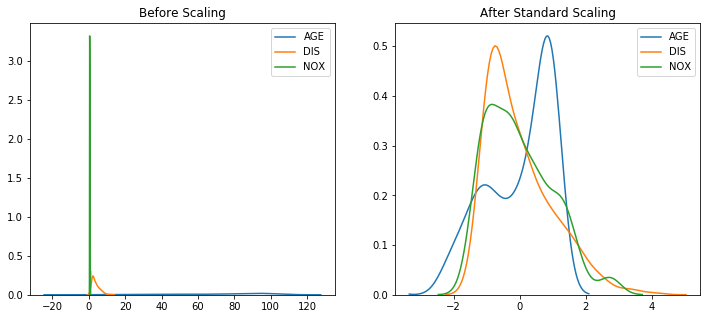

In [18]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['AGE'], ax=ax1)
sns.kdeplot(x_train['DIS'], ax=ax1)
sns.kdeplot(x_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['AGE'], ax=ax2)
sns.kdeplot(x_train_scaled['DIS'], ax=ax2)
sns.kdeplot(x_train_scaled['NOX'], ax=ax2)
plt.show()

In [19]:
x_train['AGE'].min(), x_train['AGE'].max(), 

(2.9, 100.0)

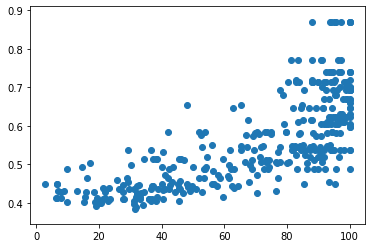

In [22]:
plt.scatter(x_train['AGE'], x_train['NOX']);

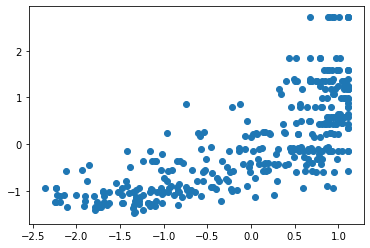

In [23]:
plt.scatter(x_train_scaled['AGE'], x_train_scaled['NOX']);

### MeanNormalization

In [28]:
x_train, x_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1),
    data['MEDV'],
    test_size=0.3,
    random_state=0
)

x_train.shape, x_test.shape

((354, 13), (152, 13))

In [29]:
_mu = x_train.mean(axis=0)
_mu

CRIM         3.358284
ZN          11.809322
INDUS       11.078757
CHAS         0.064972
NOX          0.556098
RM           6.308427
AGE         68.994068
DIS          3.762459
RAD          9.353107
TAX        401.782486
PTRATIO     18.473446
B          360.601186
LSTAT       12.440650
dtype: float64

In [30]:
_range = x_train.max(axis=0) - x_train.min(axis=0)
_range

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
CHAS         1.00000
NOX          0.48600
RM           5.21900
AGE         97.10000
DIS         10.95230
RAD         23.00000
TAX        524.00000
PTRATIO      9.40000
B          396.58000
LSTAT       35.25000
dtype: float64

In [31]:
x_train_scaled = (_mu - x_train) / _range
x_test_scaled = (_mu - x_test) / _range

In [32]:
np.round(x_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
std,0.1,0.2,0.3,0.2,0.2,0.1,0.3,0.2,0.4,0.3,0.2,0.2,0.2
min,-1.0,-0.9,-0.6,-0.9,-0.6,-0.5,-0.3,-0.8,-0.6,-0.6,-0.4,-0.1,-0.7
25%,0.0,-0.1,-0.3,0.1,-0.2,-0.1,-0.3,-0.1,-0.6,-0.5,-0.2,-0.1,-0.1
50%,0.0,0.1,0.1,0.1,0.0,0.0,-0.1,0.0,0.2,0.2,-0.1,-0.1,0.0
75%,0.0,0.1,0.2,0.1,0.2,0.1,0.2,0.2,0.2,0.2,0.1,-0.0,0.2
max,0.0,0.1,0.4,0.1,0.4,0.5,0.7,0.2,0.4,0.4,0.6,0.9,0.3


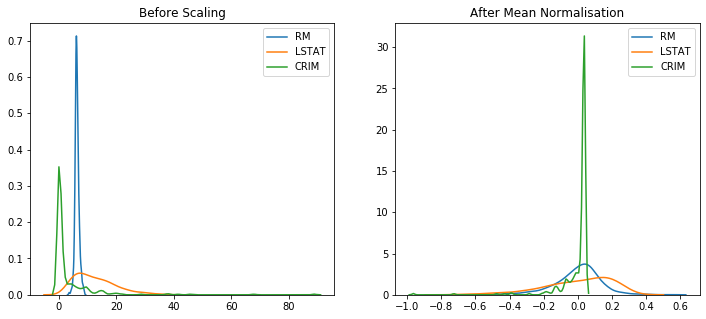

In [33]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['RM'], ax=ax1)
sns.kdeplot(x_train['LSTAT'], ax=ax1)
sns.kdeplot(x_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Mean Normalisation')
sns.kdeplot(x_train_scaled['RM'], ax=ax2)
sns.kdeplot(x_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(x_train_scaled['CRIM'], ax=ax2)
plt.show()

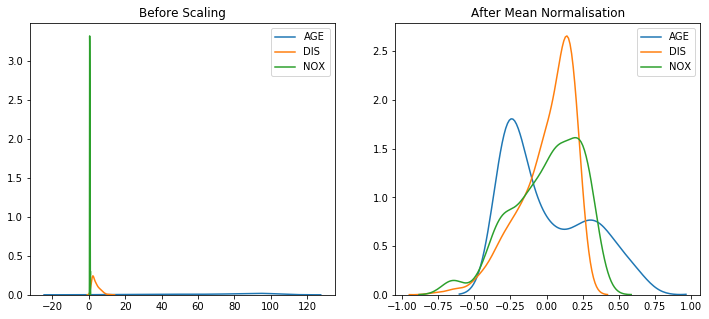

In [34]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['AGE'], ax=ax1)
sns.kdeplot(x_train['DIS'], ax=ax1)
sns.kdeplot(x_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Mean Normalisation')
sns.kdeplot(x_train_scaled['AGE'], ax=ax2)
sns.kdeplot(x_train_scaled['DIS'], ax=ax2)
sns.kdeplot(x_train_scaled['NOX'], ax=ax2)
plt.show()

### MinMax Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler

x_train, x_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1),
    data['MEDV'],
    test_size=0.3,
    random_state=0
)

x_train.shape, x_test.shape

((354, 13), (152, 13))

In [37]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [38]:
scaler.data_min_, scaler.data_max_, scaler.data_range_

(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
        3.5610e+00, 2.9000e+00, 1.1742e+00, 1.0000e+00, 1.8700e+02,
        1.2600e+01, 3.2000e-01, 1.7300e+00]),
 array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
        100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
         36.98  ]),
 array([8.896988e+01, 1.000000e+02, 2.728000e+01, 1.000000e+00,
        4.860000e-01, 5.219000e+00, 9.710000e+01, 1.095230e+01,
        2.300000e+01, 5.240000e+02, 9.400000e+00, 3.965800e+02,
        3.525000e+01]))

In [39]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [40]:
np.round(x_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,0.0,0.1,0.4,0.1,0.4,0.5,0.7,0.2,0.4,0.4,0.6,0.9,0.3
std,0.1,0.2,0.3,0.2,0.2,0.1,0.3,0.2,0.4,0.3,0.2,0.2,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.2,0.0,0.1,0.4,0.4,0.1,0.1,0.2,0.5,0.9,0.1
50%,0.0,0.0,0.3,0.0,0.3,0.5,0.8,0.2,0.2,0.2,0.7,1.0,0.3
75%,0.0,0.2,0.6,0.0,0.5,0.6,0.9,0.4,1.0,0.9,0.8,1.0,0.4
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [41]:
np.round(x_test_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0
mean,0.0,0.1,0.4,0.1,0.3,0.5,0.7,0.2,0.4,0.5,0.6,0.9,0.3
std,0.1,0.2,0.2,0.3,0.2,0.1,0.3,0.2,0.4,0.3,0.2,0.3,0.2
min,0.0,0.0,0.0,0.0,0.0,0.1,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.2,0.0,0.1,0.4,0.4,0.1,0.1,0.2,0.5,0.9,0.2
50%,0.0,0.0,0.3,0.0,0.3,0.5,0.7,0.2,0.2,0.4,0.6,1.0,0.3
75%,0.1,0.0,0.6,0.0,0.5,0.6,1.0,0.4,1.0,0.9,0.8,1.0,0.4
max,0.8,1.0,1.0,1.0,1.0,1.0,1.0,0.9,1.0,1.0,0.9,1.0,1.0


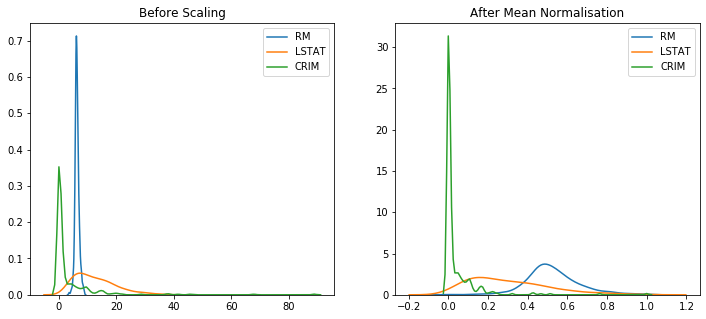

In [42]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['RM'], ax=ax1)
sns.kdeplot(x_train['LSTAT'], ax=ax1)
sns.kdeplot(x_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Mean Normalisation')
sns.kdeplot(x_train_scaled['RM'], ax=ax2)
sns.kdeplot(x_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(x_train_scaled['CRIM'], ax=ax2)
plt.show()

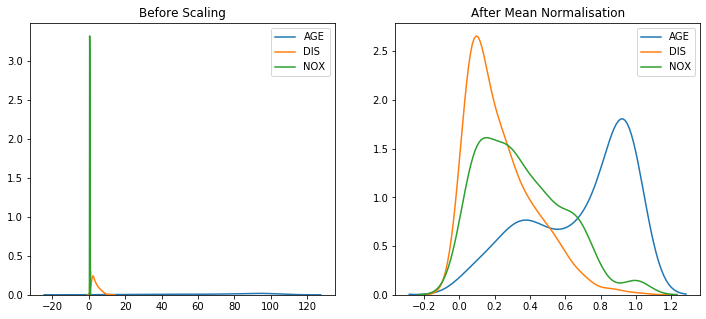

In [43]:
# let's compare the variable distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['AGE'], ax=ax1)
sns.kdeplot(x_train['DIS'], ax=ax1)
sns.kdeplot(x_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Mean Normalisation')
sns.kdeplot(x_train_scaled['AGE'], ax=ax2)
sns.kdeplot(x_train_scaled['DIS'], ax=ax2)
sns.kdeplot(x_train_scaled['NOX'], ax=ax2)
plt.show()

### Maximun Absolute Scaling

In [45]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

x_train, x_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1),
    data['MEDV'],
    test_size=0.3,
    random_state=0
)

x_train.shape, x_test.shape

((354, 13), (152, 13))

In [46]:
scaler = MaxAbsScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [47]:
scaler.max_abs_

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        36.98  ])

In [48]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [49]:
np.round(x_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,0.0,0.1,0.4,0.1,0.6,0.7,0.7,0.3,0.4,0.6,0.8,0.9,0.3
std,0.1,0.2,0.3,0.2,0.1,0.1,0.3,0.2,0.4,0.2,0.1,0.2,0.2
min,0.0,0.0,0.0,0.0,0.4,0.4,0.0,0.1,0.0,0.3,0.6,0.0,0.0
25%,0.0,0.0,0.2,0.0,0.5,0.7,0.5,0.2,0.2,0.4,0.8,0.9,0.2
50%,0.0,0.0,0.3,0.0,0.6,0.7,0.8,0.3,0.2,0.4,0.9,1.0,0.3
75%,0.0,0.2,0.7,0.0,0.7,0.8,0.9,0.4,1.0,0.9,0.9,1.0,0.5
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [50]:
np.round(x_test_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0
mean,0.0,0.1,0.4,0.1,0.6,0.7,0.7,0.3,0.4,0.6,0.8,0.9,0.4
std,0.1,0.2,0.2,0.3,0.1,0.1,0.3,0.2,0.4,0.2,0.1,0.3,0.2
min,0.0,0.0,0.0,0.0,0.5,0.4,0.1,0.1,0.0,0.3,0.6,0.0,0.1
25%,0.0,0.0,0.2,0.0,0.5,0.7,0.4,0.2,0.2,0.4,0.8,0.9,0.2
50%,0.0,0.0,0.4,0.0,0.6,0.7,0.7,0.3,0.2,0.5,0.8,1.0,0.3
75%,0.1,0.0,0.7,0.0,0.7,0.7,1.0,0.5,1.0,0.9,0.9,1.0,0.5
max,0.8,1.0,1.0,1.0,1.0,1.0,1.0,0.9,1.0,1.0,1.0,1.0,1.0


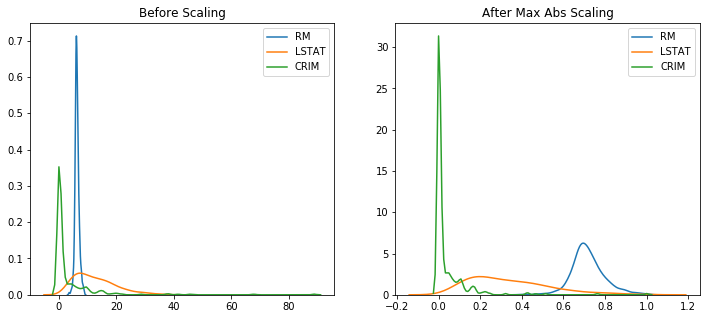

In [54]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['RM'], ax=ax1)
sns.kdeplot(x_train['LSTAT'], ax=ax1)
sns.kdeplot(x_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Max Abs Scaling')
sns.kdeplot(x_train_scaled['RM'], ax=ax2)
sns.kdeplot(x_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(x_train_scaled['CRIM'], ax=ax2)
plt.show()

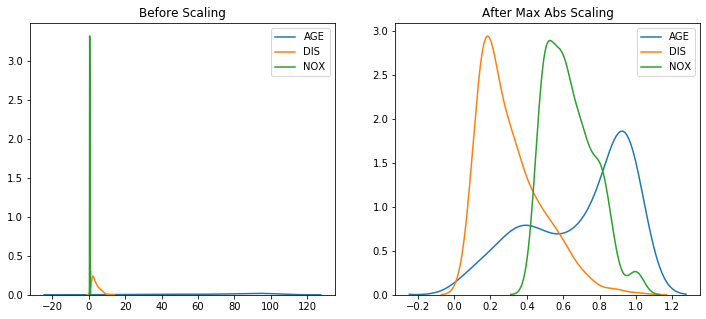

In [53]:
# let's compare the variable distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['AGE'], ax=ax1)
sns.kdeplot(x_train['DIS'], ax=ax1)
sns.kdeplot(x_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Max Abs Scaling')
sns.kdeplot(x_train_scaled['AGE'], ax=ax2)
sns.kdeplot(x_train_scaled['DIS'], ax=ax2)
sns.kdeplot(x_train_scaled['NOX'], ax=ax2)
plt.show()

### Centering + MaxAbs Scaling

In [55]:
mean_scaler = StandardScaler(with_mean=True, with_std=False)
max_abs_scaler = MaxAbsScaler()

# fit train to both
mean_scaler.fit(x_train)
max_abs_scaler.fit(x_train)

# scale by applying transforming
x_train_scaled = max_abs_scaler.transform(mean_scaler.transform(x_train))
x_test_scaled = max_abs_scaler.transform(mean_scaler.transform(x_test))


In [56]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

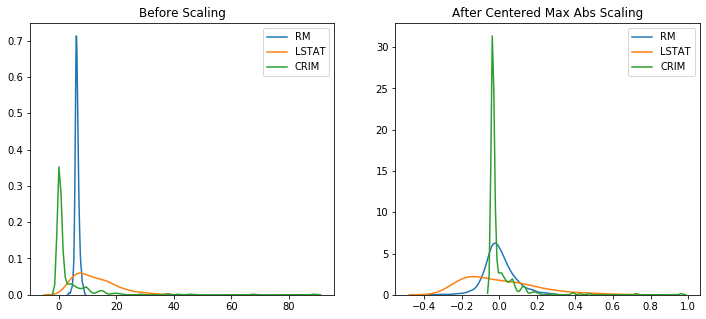

In [57]:
# let's compare the variable distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['RM'], ax=ax1)
sns.kdeplot(x_train['LSTAT'], ax=ax1)
sns.kdeplot(x_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Centered Max Abs Scaling')
sns.kdeplot(x_train_scaled['RM'], ax=ax2)
sns.kdeplot(x_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(x_train_scaled['CRIM'], ax=ax2)
plt.show()

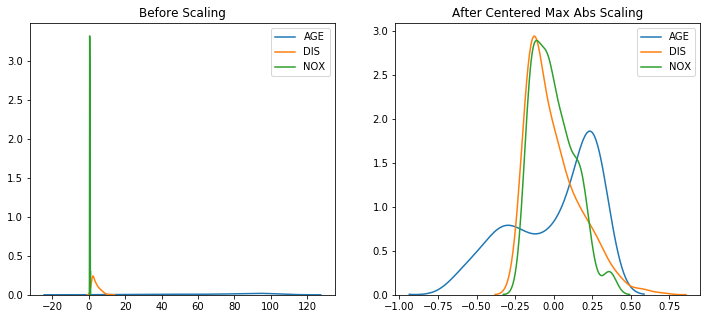

In [58]:
# let's compare the variable distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['AGE'], ax=ax1)
sns.kdeplot(x_train['DIS'], ax=ax1)
sns.kdeplot(x_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Centered Max Abs Scaling')
sns.kdeplot(x_train_scaled['AGE'], ax=ax2)
sns.kdeplot(x_train_scaled['DIS'], ax=ax2)
sns.kdeplot(x_train_scaled['NOX'], ax=ax2)
plt.show()

### Robust Scaling

In [59]:
from sklearn.preprocessing import RobustScaler

In [60]:
scaler = RobustScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

np.round(x_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,1.0,0.6,0.2,0.1,0.1,0.1,-0.2,0.2,0.2,0.2,-0.2,-1.6,0.1
std,2.8,1.2,0.5,0.2,0.6,0.9,0.6,0.7,0.4,0.4,0.8,4.4,0.7
min,-0.1,0.0,-0.6,0.0,-0.9,-3.5,-1.6,-0.7,-0.2,-0.3,-2.3,-19.9,-0.9
25%,-0.1,0.0,-0.3,0.0,-0.5,-0.4,-0.7,-0.4,-0.0,-0.1,-0.6,-0.8,-0.4
50%,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0
75%,0.9,1.0,0.7,0.0,0.5,0.6,0.3,0.6,1.0,0.9,0.4,0.2,0.6
max,29.3,5.0,1.5,1.0,1.9,3.4,0.4,3.0,1.0,1.0,1.0,0.3,2.6


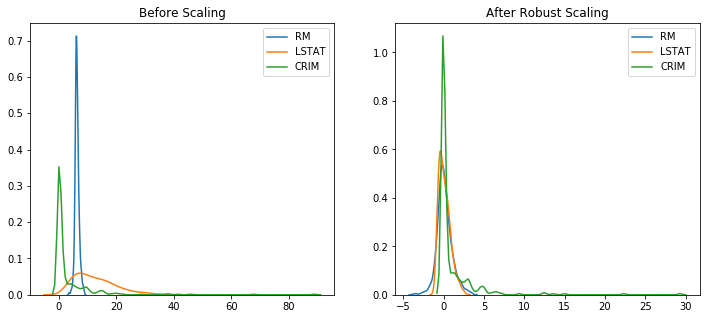

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['RM'], ax=ax1)
sns.kdeplot(x_train['LSTAT'], ax=ax1)
sns.kdeplot(x_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Robust Scaling')
sns.kdeplot(x_train_scaled['RM'], ax=ax2)
sns.kdeplot(x_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(x_train_scaled['CRIM'], ax=ax2)
plt.show()

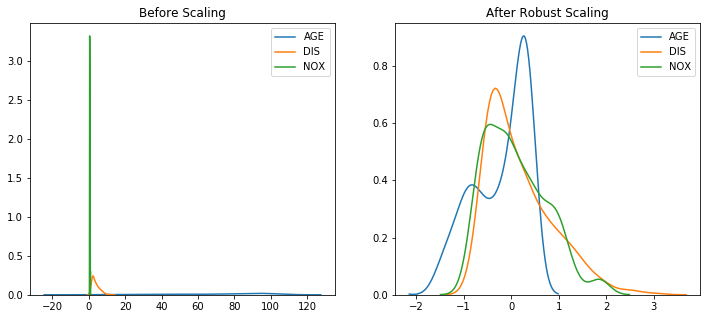

In [62]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['AGE'], ax=ax1)
sns.kdeplot(x_train['DIS'], ax=ax1)
sns.kdeplot(x_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Robust Scaling')
sns.kdeplot(x_train_scaled['AGE'], ax=ax2)
sns.kdeplot(x_train_scaled['DIS'], ax=ax2)
sns.kdeplot(x_train_scaled['NOX'], ax=ax2)
plt.show()